# Exploratory Data Analysis of Comments

In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, f1_score

ratings_filepath = 'models/comments_rated.csv'

# Load data from csv
df = pd.read_csv(ratings_filepath, encoding="utf-8", delimiter=";")
df.head()

,comment_id,updated,shortcode,created_at,comment_text,comment_likes,translation,tokens,positive,neutral,negative,sentiment
0,"1,78932E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,@urban_bogi_ mine?😍,1,@urban_bogi_ mine?😍,"'@urban_bogi_', 'mine', '😍'",1,0,0,positive
1,"1,78701E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,😍😍😍😍😍😍,0,😍😍😍😍😍😍,"'😍', '😍', '😍'",1,0,0,positive
2,"1,7944E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:48,❤️,0,❤️,"'❤', '️'",1,0,0,positive
3,"1,81552E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:58,@youssefseoudy,1,@Youssefseoudy,'@youssefseoudy',0,1,0,neutral
4,"1,80269E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 19:07,🔥,0,🔥,'🔥',1,0,0,positive


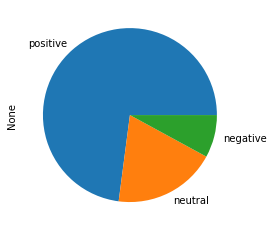

In [3]:
# Plot percentages of positive, neutral and negative comments

df[['positive', 'neutral', 'negative']].mean().plot.pie();

Finding:
The manual rating of almost 6.2k comments resulted in 73% of all comments as positive, 19% as neutral and only 8% as negative. This shows the overall tendency of positive sentiment on the automotive channels.

In [8]:
# Score with VADER

sid = SentimentIntensityAnalyzer()
df['scores'] = df['translation'].apply(lambda translation: sid.polarity_scores(translation))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['vader_rating'] = df['compound'].apply(lambda val: 'positive' if val>0.05 else ('negative' if val<-0.05 else 'neutral'))
df.head()

,comment_id,updated,shortcode,created_at,comment_text,comment_likes,translation,tokens,positive,neutral,negative,sentiment,scores,compound,vader_rating,vader_accuracy
0,"1,78932E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,@urban_bogi_ mine?😍,1,@urban_bogi_ mine?😍,"'@urban_bogi_', 'mine', '😍'",1,0,0,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.4588,positive,True
1,"1,78701E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,😍😍😍😍😍😍,0,😍😍😍😍😍😍,"'😍', '😍', '😍'",1,0,0,positive,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.9517,positive,True
2,"1,7944E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:48,❤️,0,❤️,"'❤', '️'",1,0,0,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,False
3,"1,81552E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:58,@youssefseoudy,1,@Youssefseoudy,'@youssefseoudy',0,1,0,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,True
4,"1,80269E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 19:07,🔥,0,🔥,'🔥',1,0,0,positive,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,negative,False


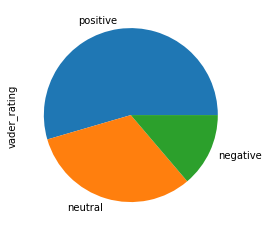

In [9]:
# Plot percentages of positive, neutral and negative comments according to VADER

df['vader_rating'].value_counts().plot.pie();

Finding:
The rating using VADER resulted in only 55% of all comments as positive, 32% as neutral and only 14% as negative. This shows that VADER rated much less positive and more neutral.

In [11]:
# Compare accuracy of VADER

df['vader_accuracy'] = df.apply(lambda x : (x['positive'] == 1 and x['vader_rating'] == 'positive') or (x['neutral'] == 1 and x['vader_rating'] == 'neutral') or (x['negative'] == 1 and x['vader_rating'] == 'negative'), axis=1)
df.head()

,comment_id,updated,shortcode,created_at,comment_text,comment_likes,translation,tokens,positive,neutral,negative,sentiment,scores,compound,vader_rating,vader_accuracy
0,"1,78932E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,@urban_bogi_ mine?😍,1,@urban_bogi_ mine?😍,"'@urban_bogi_', 'mine', '😍'",1,0,0,positive,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.4588,positive,True
1,"1,78701E+16",21.06.2021 15:01,CJxzguwpYWi,21.01.2021 19:01,😍😍😍😍😍😍,0,😍😍😍😍😍😍,"'😍', '😍', '😍'",1,0,0,positive,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.9517,positive,True
2,"1,7944E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:48,❤️,0,❤️,"'❤', '️'",1,0,0,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,False
3,"1,81552E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 18:58,@youssefseoudy,1,@Youssefseoudy,'@youssefseoudy',0,1,0,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,True
4,"1,80269E+16",21.06.2021 15:02,CJyqdXXpB0v,22.01.2021 19:07,🔥,0,🔥,'🔥',1,0,0,positive,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,negative,False


In [12]:
df['vader_accuracy'].value_counts()/df['vader_accuracy'].count()

True     0.652679
False    0.347321
Name: vader_accuracy, dtype: float64

## Accuracy of VADER Sentiment Classification: 65.3%

In [14]:
# F1 score weighted

y_actual = df['sentiment']
y_pred = df['vader_rating']

print(f1_score(y_actual, y_pred, average='weighted', zero_division=0))

0.6799145630052832


## Weighted F1 score of VADER Sentiment Classification: 68%

## Some examples why a custom algorithm might be able to beat the VADER classification

Emoticons and Instagram-specifics are not classified correctly by VADER:  
e.g. ❤️ is rated as neutral, but is used to signal "love/loving sth."  
e.g. 🔥 is rated as negative, but it's used in the automotive context as equivalent to "hot", hence expressing a positive sentiment  
e.g. 👍	is rated as neutral, but is also used as "thumbs up", positive appreciation  
e.g. "🤢🤢🤢🤢🤢🤢🤢🤢 Gay" is rated as neutral, but meant in a very negative way  
e.g. 😪🤢 is rated as neutral, but also has a negative connotation  
e.g. "unfollow" is rated as neutral, but in the Instagram context means, someone is unfollowing the account as they don't like the post / account, hence one of the most negative consequences within Instagram  
e.g. "Why 👎👎" is rated as neutral, but definitely meant in a negative way  
...  
  